In [1]:
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

import peik

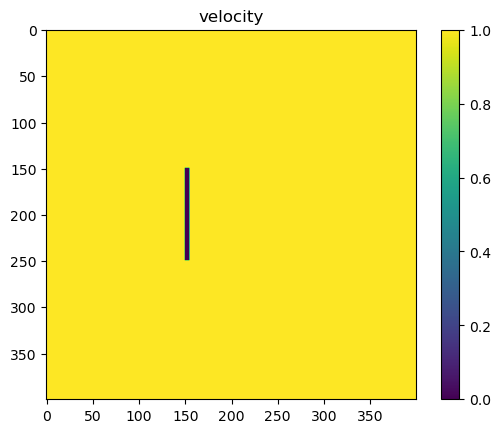

In [2]:
width = 400
# image = jax.random.uniform(key, shape=(width, width))
# image = jsp.signal.convolve(image, filt, mode='same', method='fft')

# # Normalize to [0.1, 1]
# image -= (jnp.min(image) - 0.1)
# image /= jnp.max(image)
velocity = jnp.ones((width, width))

velocity = velocity.at[150:250, 150:155].set(0.0)

plt.title('velocity')
plt.imshow(velocity)
_ = plt.colorbar()

In [3]:
slowness = 1.0/(velocity + 1e-6)

In [4]:
start_val = 2 * width * jnp.max(slowness)

start_tt = jnp.full((width, width), start_val)
start_tt = start_tt.at[width // 2, width // 2].set(0.0)

In [5]:
uu = np.array(start_tt)
peik.eik1.solve(np.array(slowness), uu, 4)

iter 0/4
iter 1/4
iter 2/4
iter 3/4


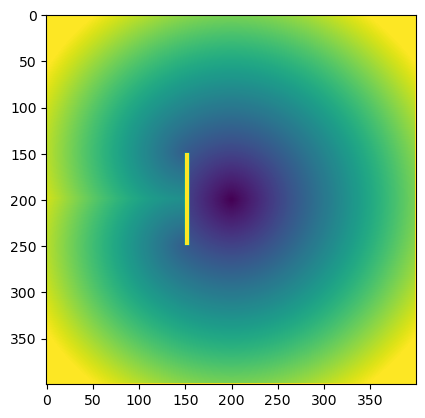

In [6]:
plt.imshow(jnp.minimum(uu, 250.0))

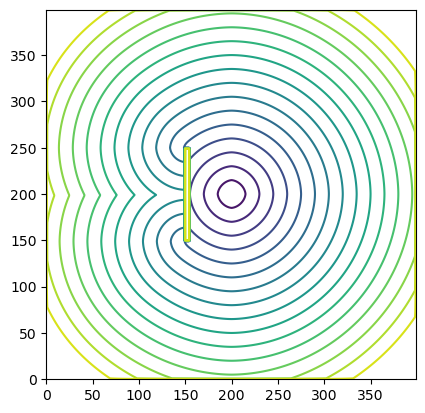

In [7]:
plt.contour(jnp.minimum(uu, 250), levels=20)
plt.gca().set_aspect('equal')